# Final model

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [4]:
# id index
df['id'] = df.index
# 결측값 제거
df = df.dropna()
df .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [5]:
X = df.drop(columns=['stroke'])
y = df.stroke

# Odds
pd.get_dummies(df): df 데이터프레임의 object 데이터타입(카테고리 변수)를 풀어서 타입 별 칼럼으로 만들어줌

In [17]:
pd.get_dummies(df).head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,2,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,3,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,4,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,5,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [21]:
pd.get_dummies(df).columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [13]:
# 고혈압 오즈 구하기
odd_hypertension = pd.get_dummies(df)['hypertension'].value_counts()
odd_hypertension

0    4458
1     451
Name: hypertension, dtype: int64

In [14]:
odds_hypertension = odd_hypertension[1]/odd_hypertension[0]
odds_hypertension

0.10116644235082997

In [15]:
# stroke 오즈
odd_stroke = pd.get_dummies(df)['stroke'].value_counts()
odd_stroke

0    4700
1     209
Name: stroke, dtype: int64

In [16]:
odds_stroke = odd_stroke[1]/odd_stroke[0]
odds_stroke

0.044468085106382976

In [18]:
df_dummies = pd.get_dummies(df)

In [19]:
# Residence_type
odds_Residence_type = df_dummies['Residence_type_Rural'].sum()/df_dummies['Residence_type_Urban'].sum()
odds_Residence_type

0.9714859437751004

In [22]:
odds_marrige = df_dummies['ever_married_Yes'].sum()/df_dummies['ever_married_No'].sum()
odds_marrige

1.8791788856304985

In [26]:
odds = [odds_stroke,odds_hypertension,odds_marrige,odds_Residence_type]
odds_name = ["stroke","hypertension","marrige","Residence"]

<Axes: >

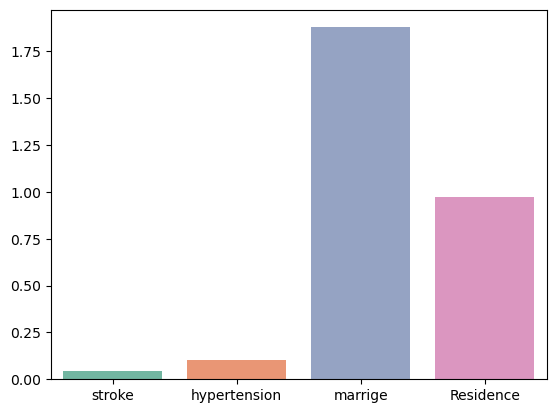

In [32]:
sns.set_palette("Set2")
sns.barplot(x=odds_name,y=odds)

# EDA

In [6]:
# 전체의 5% 정도
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [5]:
import forestplot as fp
fp.forestplot(df,  # the dataframe with results data
              estimate="stroke",  # col containing estimated effect size 
              ll="ll", hl="hl",  # lower & higher limits of conf. int.
              varlabel="label",  # column containing the varlabels to be printed on far left
              capitalize="capitalize",  # Capitalize labels
              ci_report=False,  # Turn off conf. int. reporting
              flush=False,  # Turn off left-flush of text
              **{'fontfamily': 'sans-serif'}  # revert to sans-serif                              
              )

KeyError: 'll'

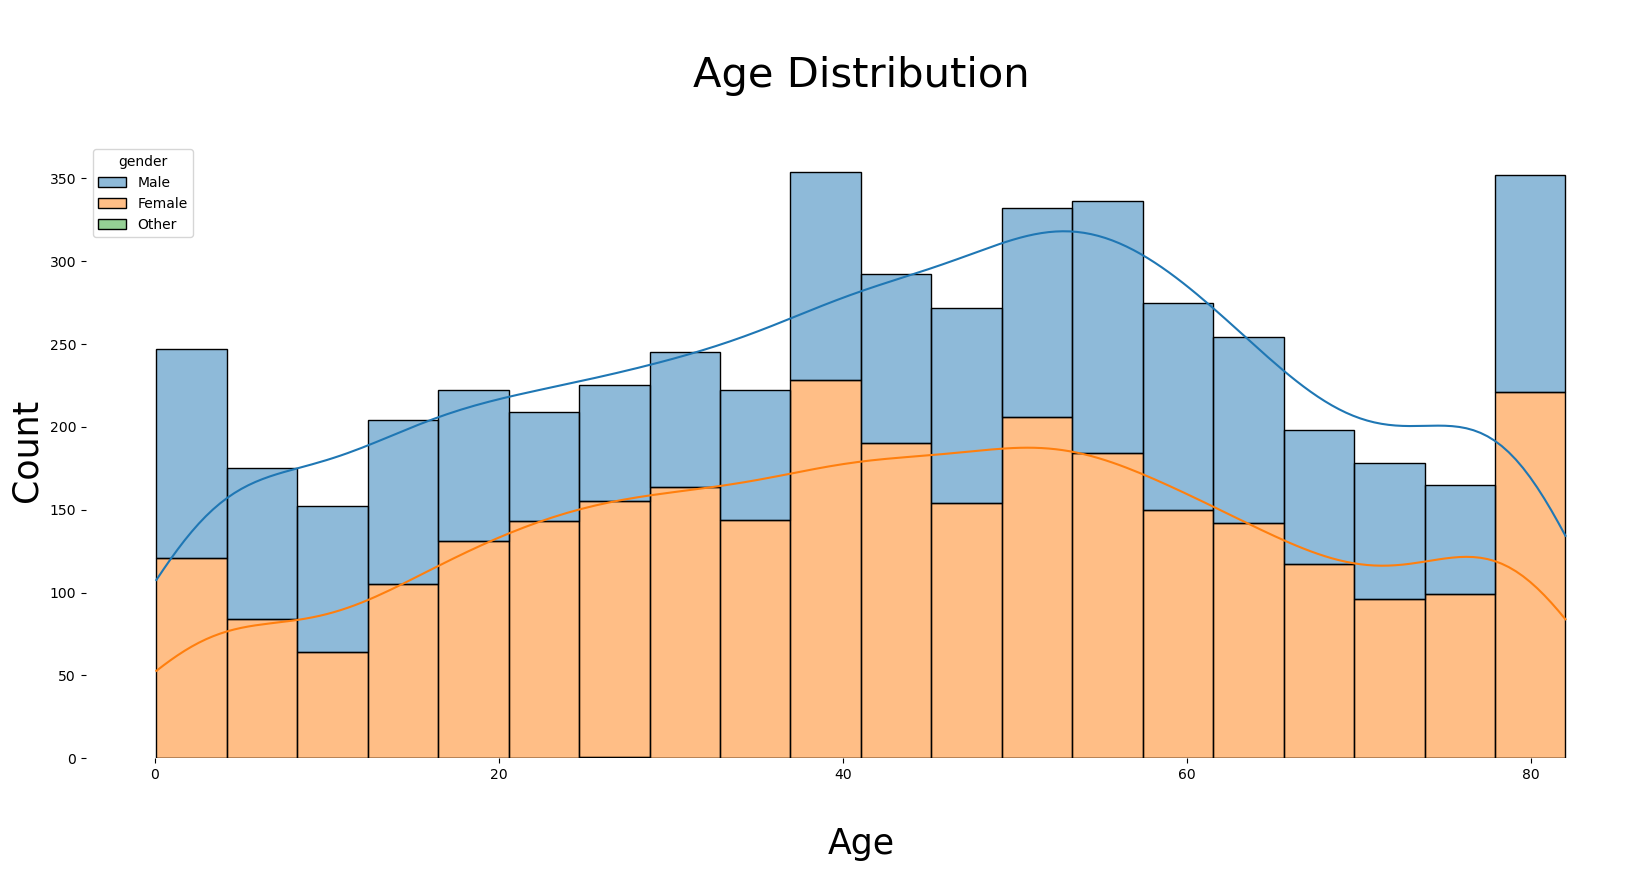

In [16]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=df,x="age",hue="gender",multiple="stack",kde=True,fill=True)
p.axes.set_title("\nAge Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAge",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

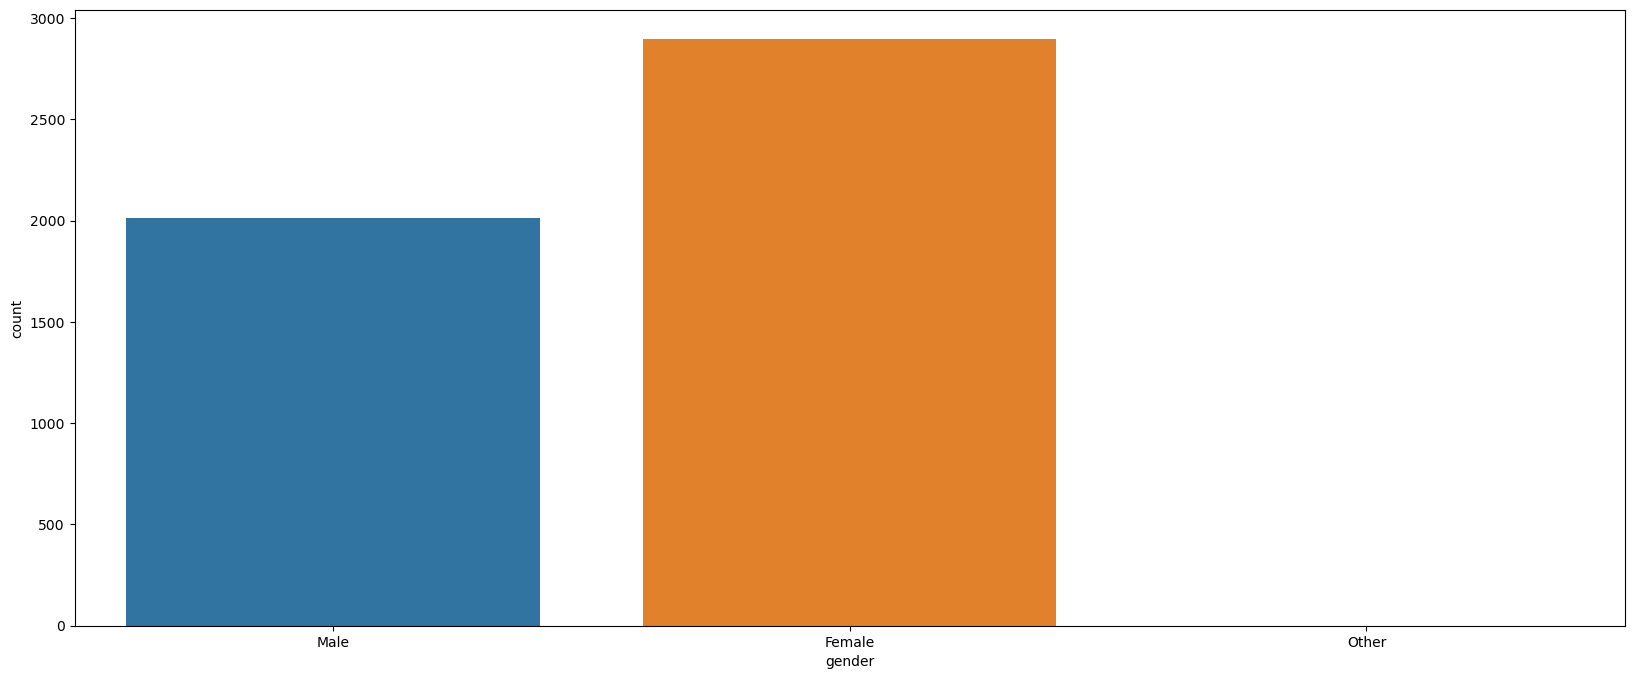

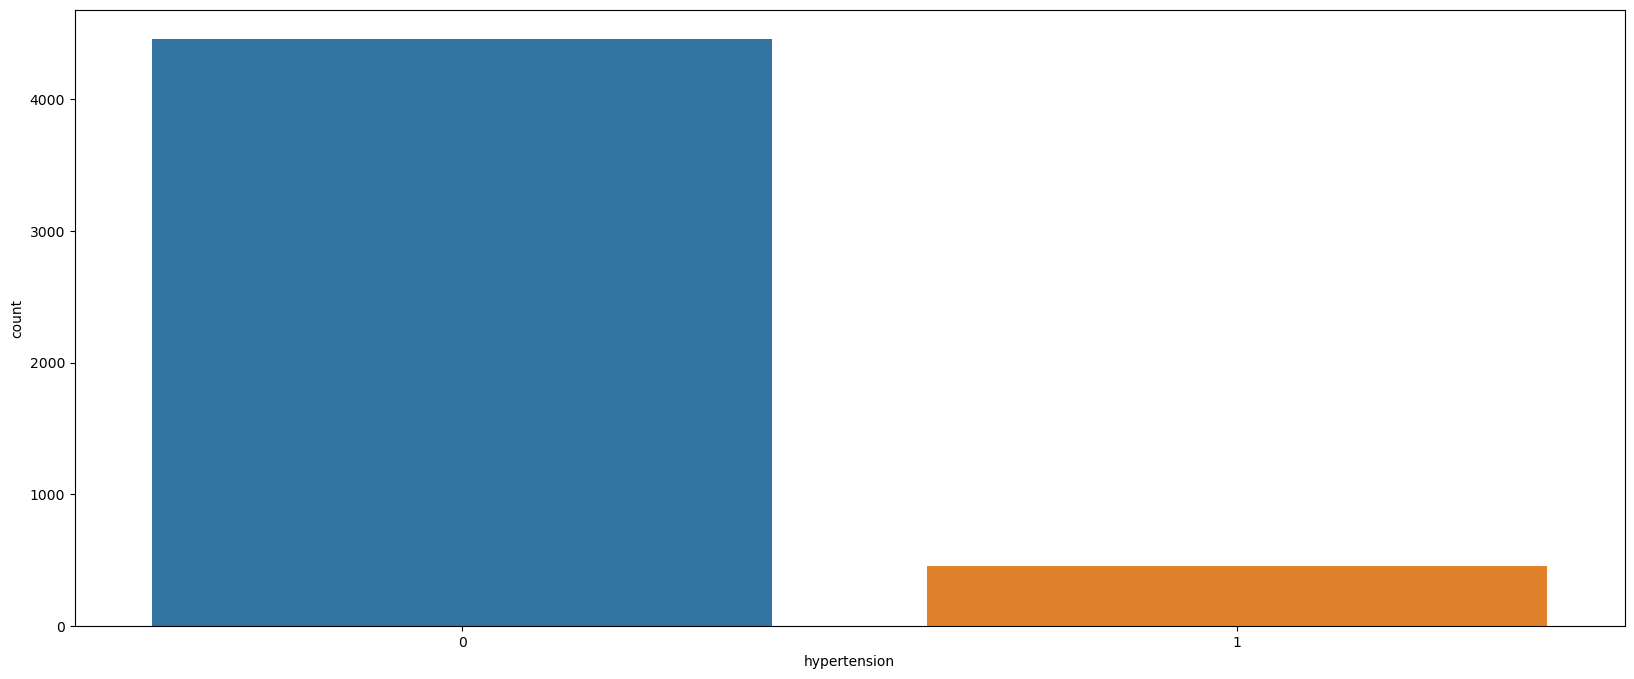

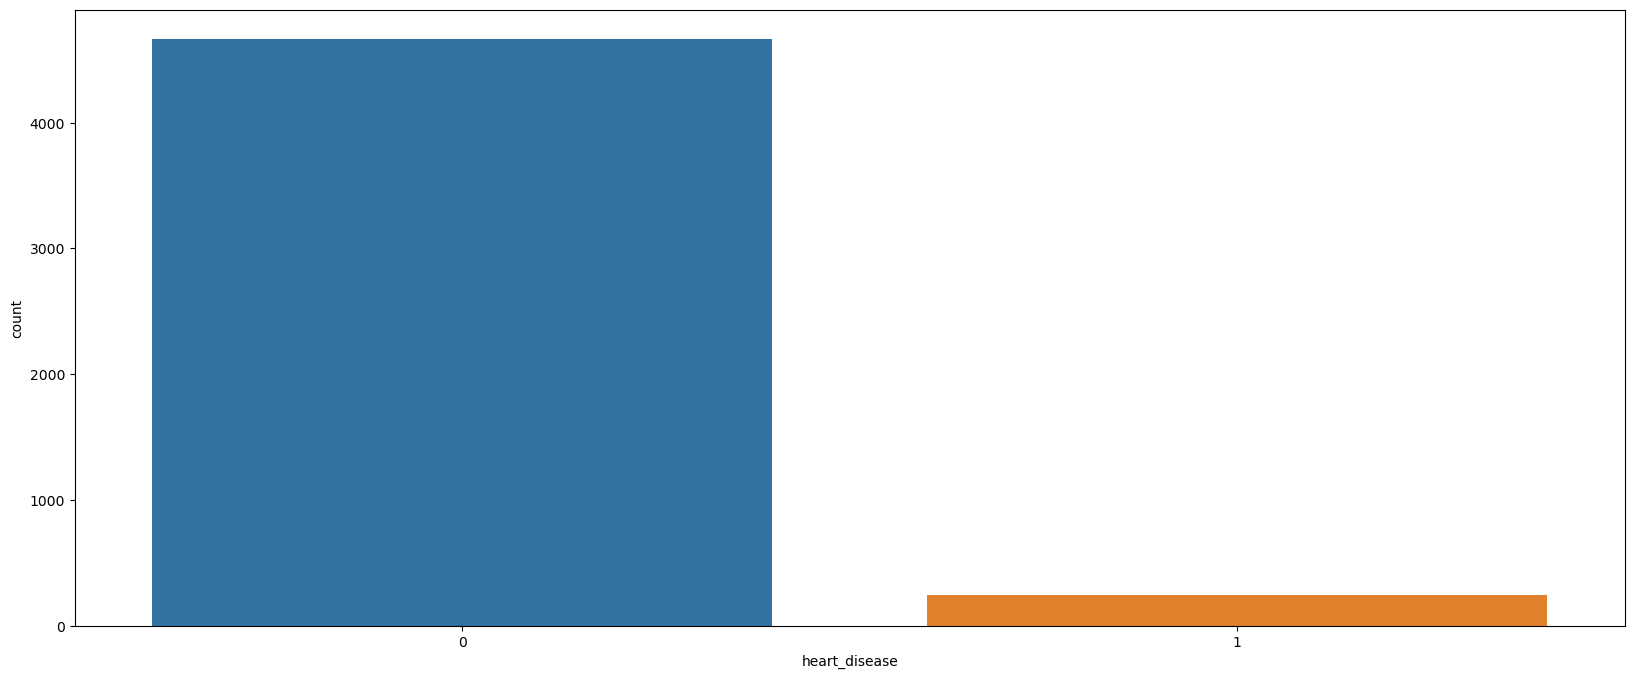

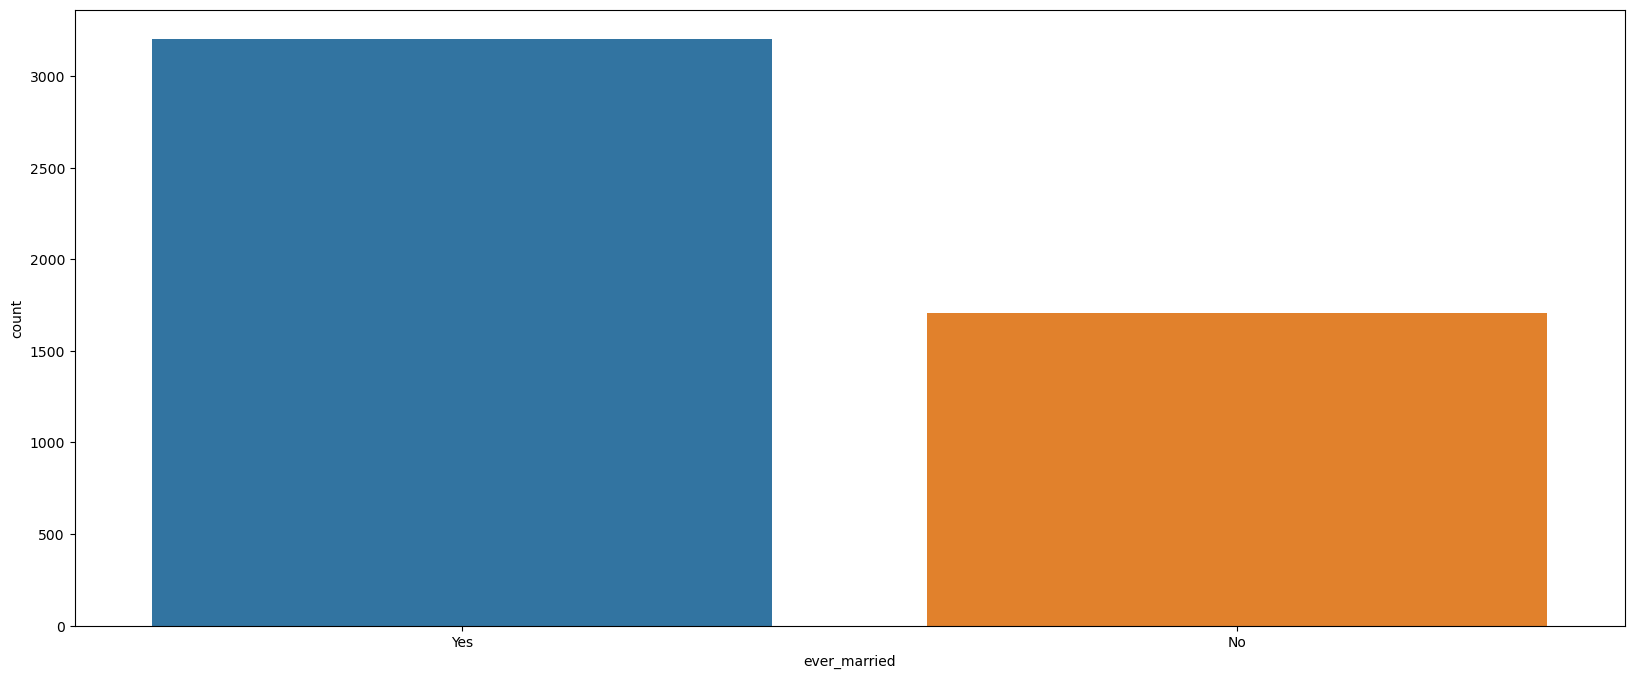

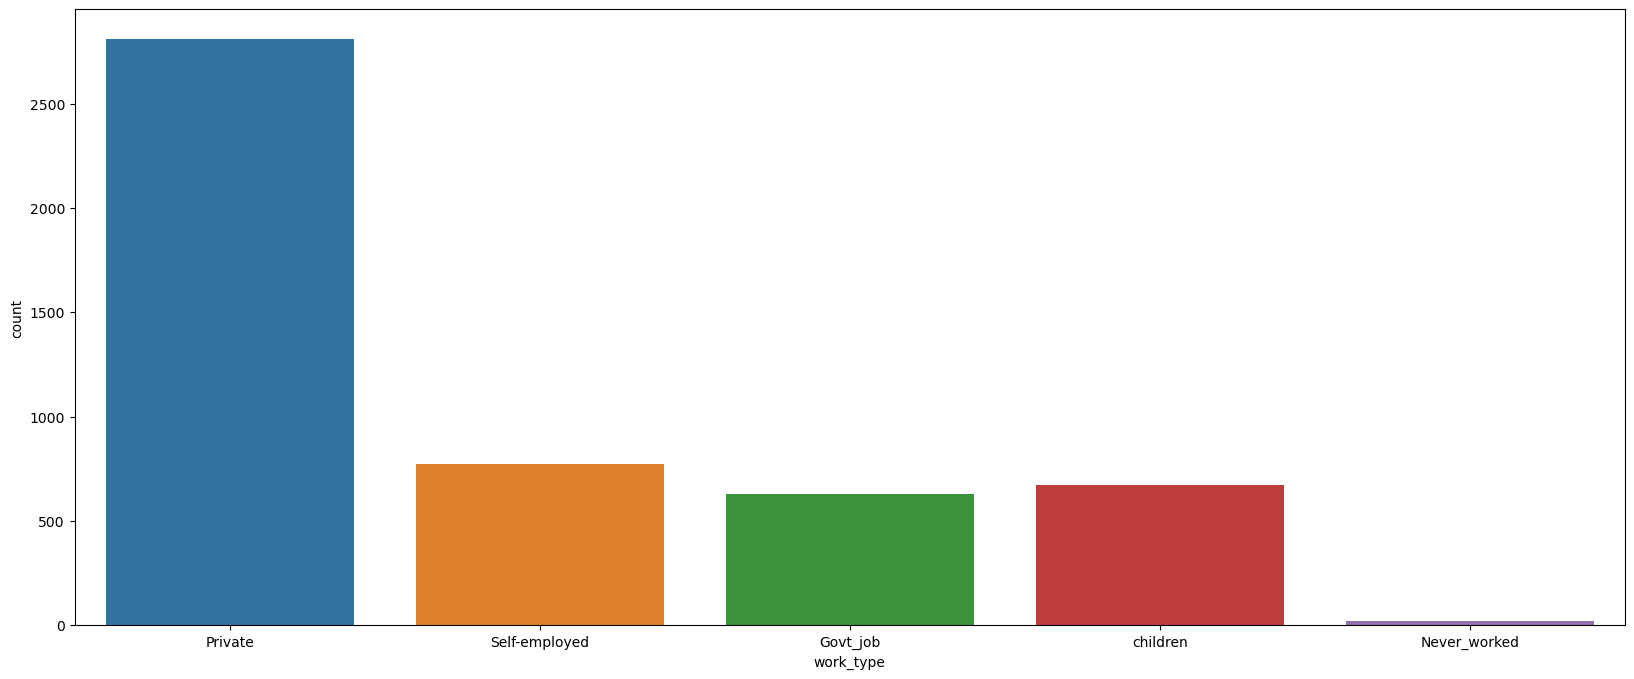

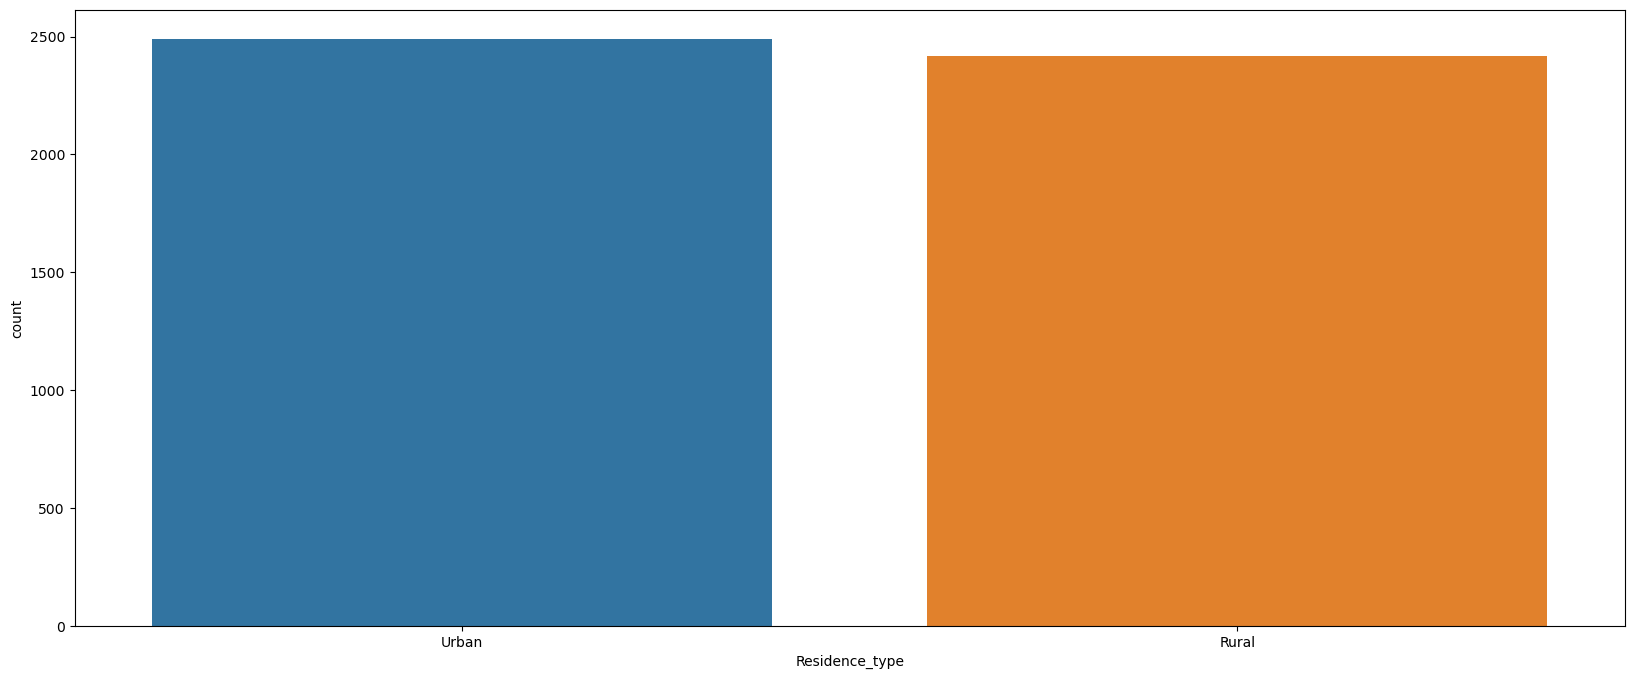

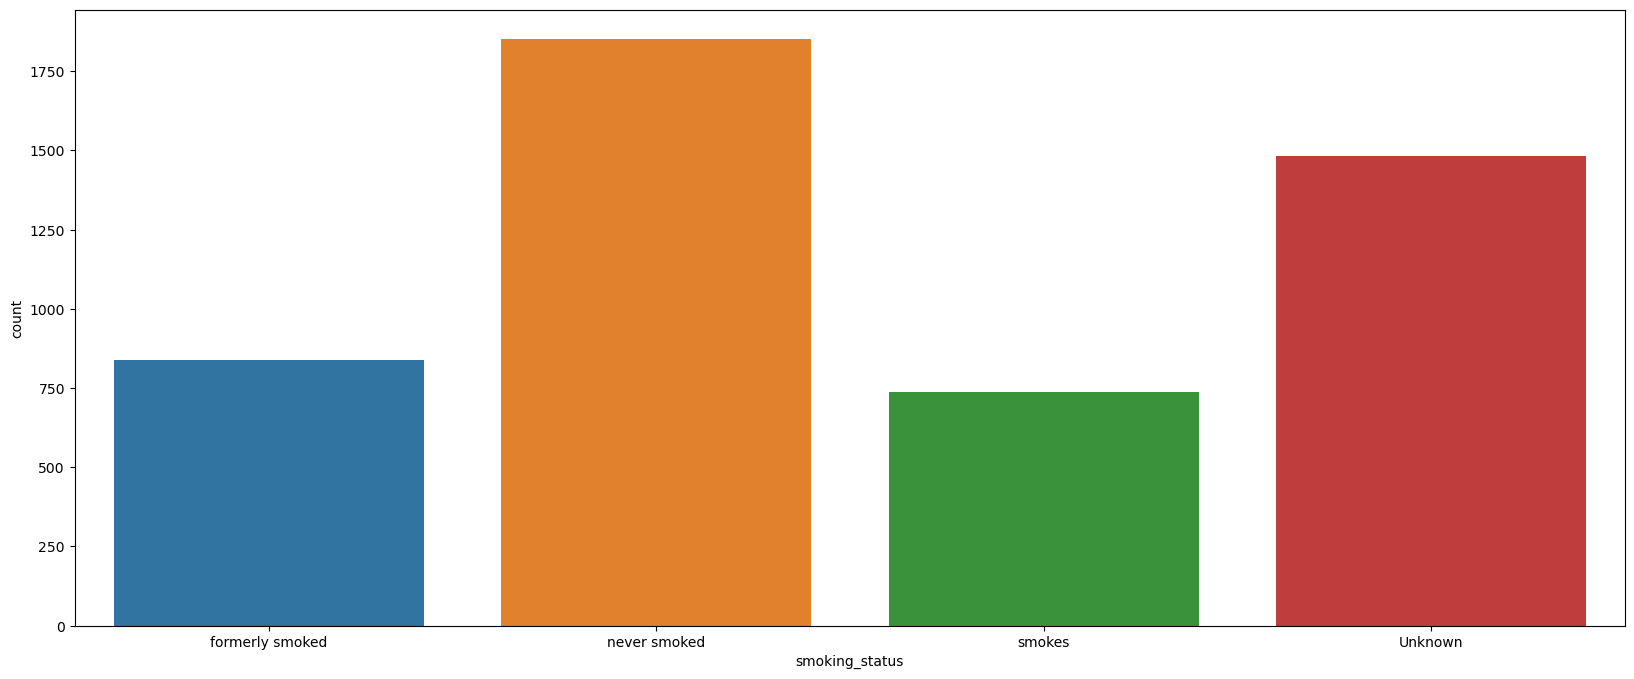

In [14]:
# Countplot for categorical columns
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    plt.subplots(figsize=(20, 8))
    sns.countplot(x=col, data=df)
    plt.show()

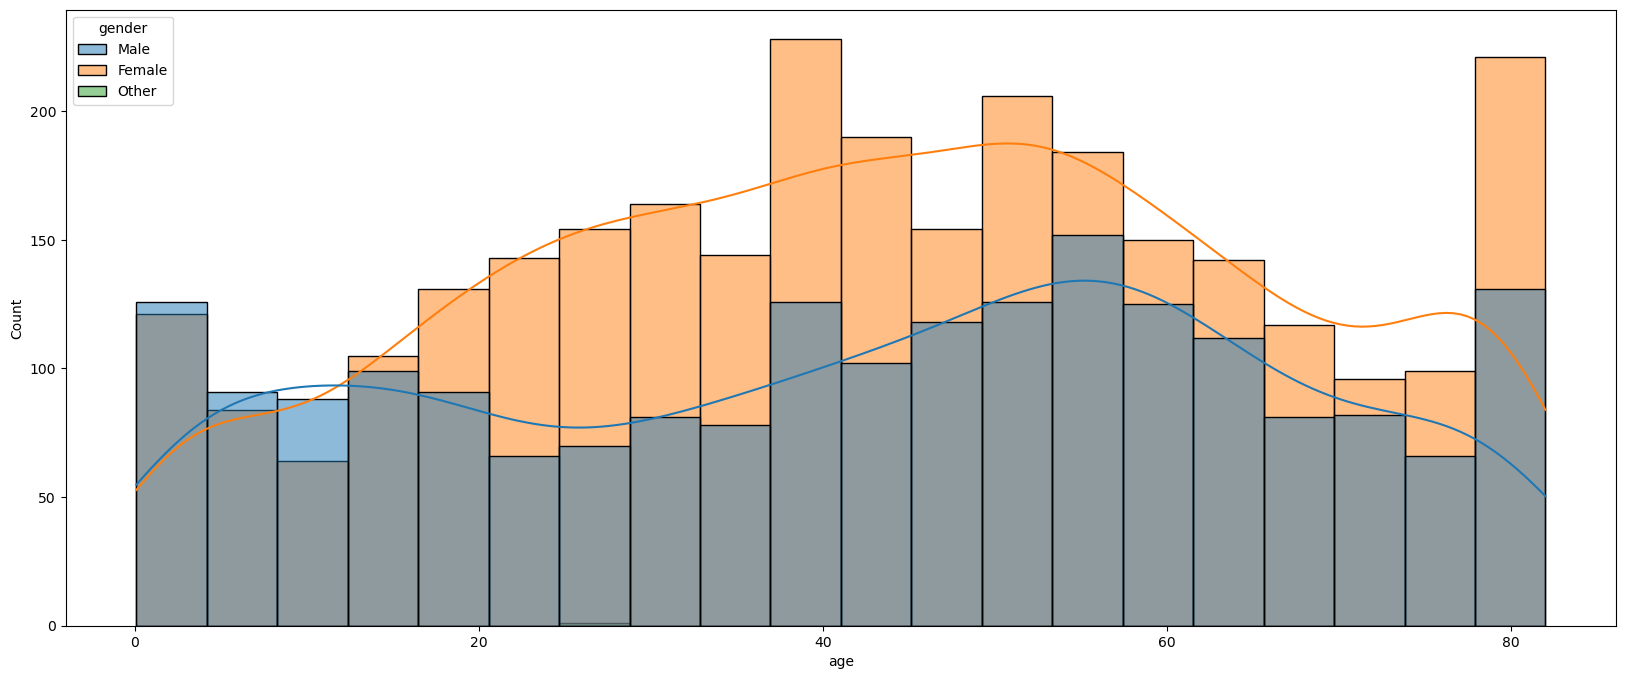

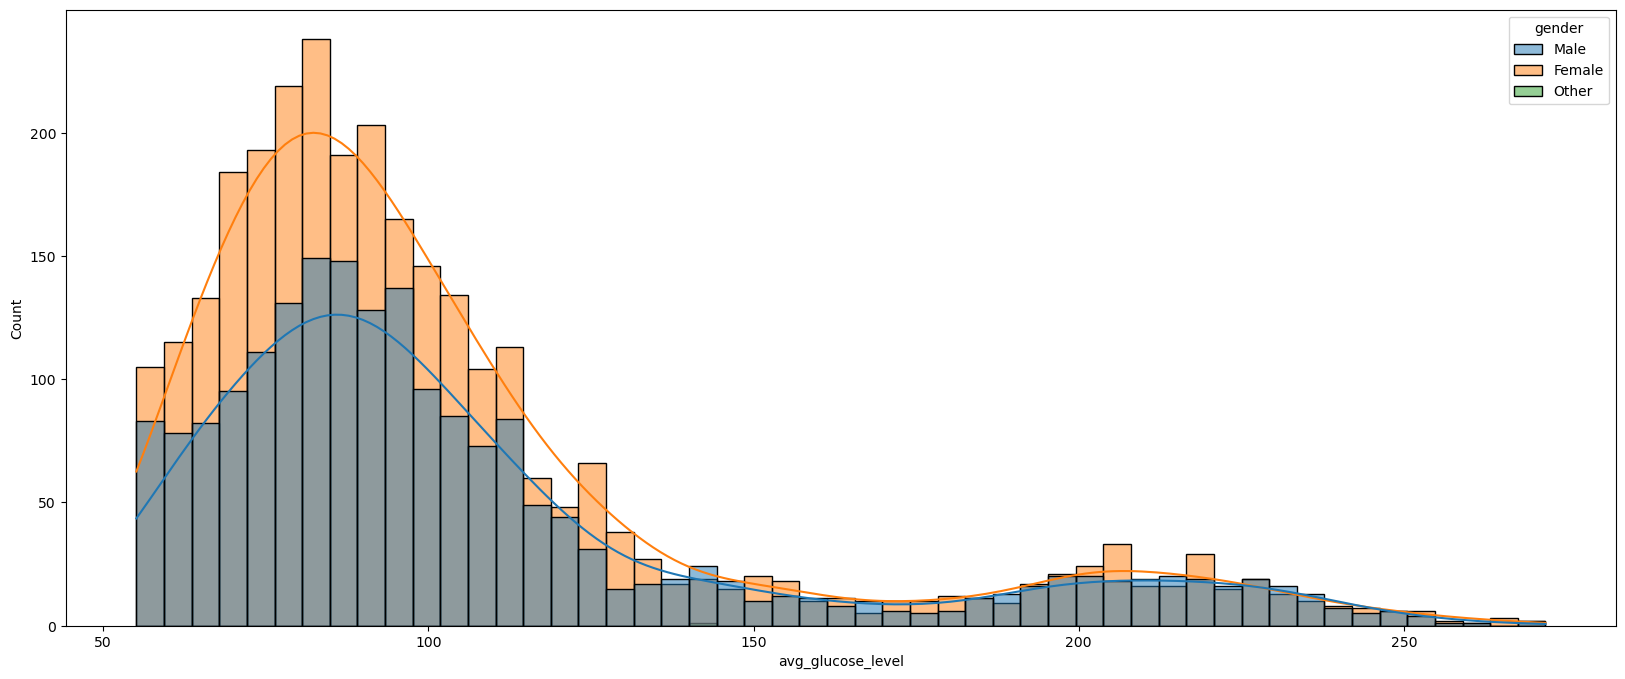

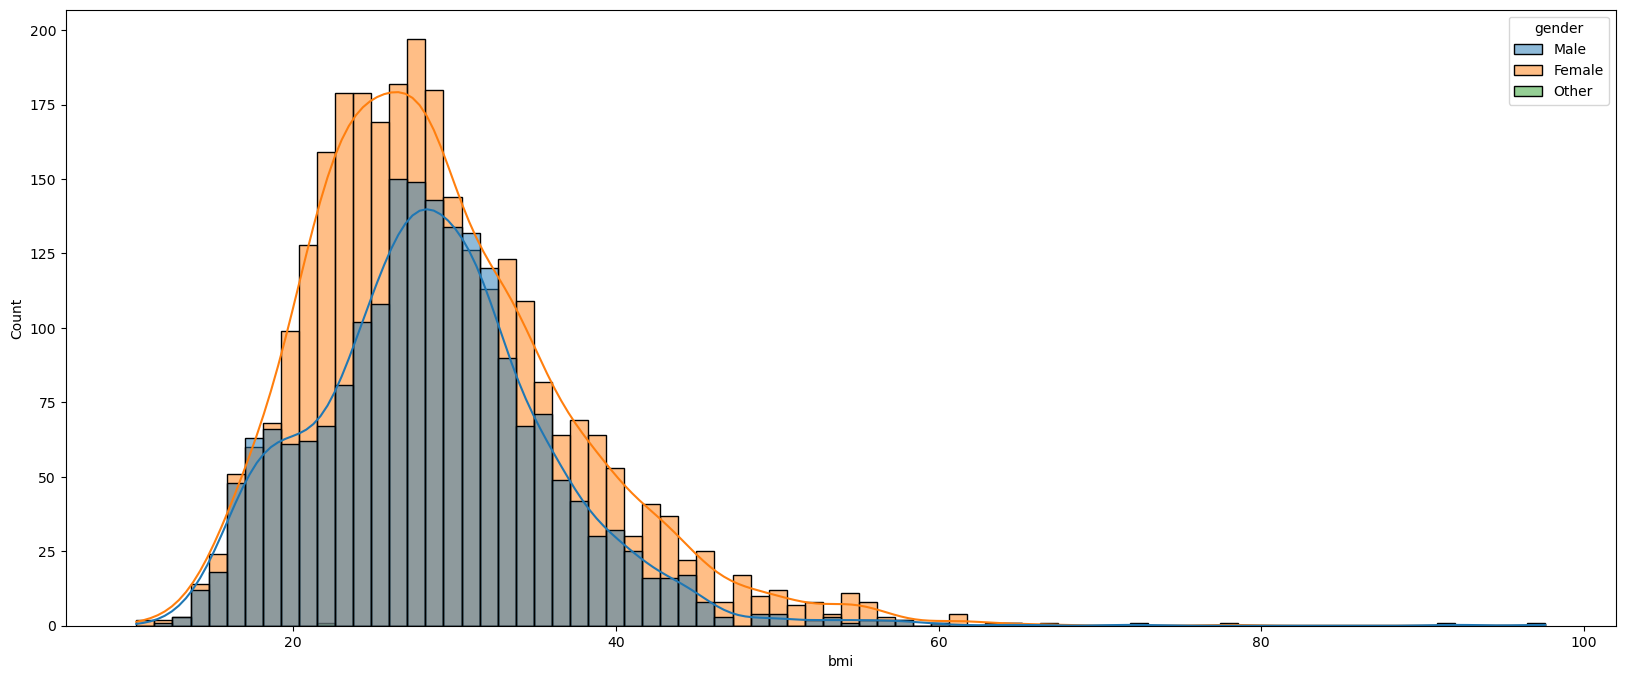

In [17]:
# Histogram for numerical columns

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_columns:
    plt.subplots(figsize=(20, 8))
    sns.histplot(data = df, x = col ,hue = 'gender', kde=True)
    plt.show()

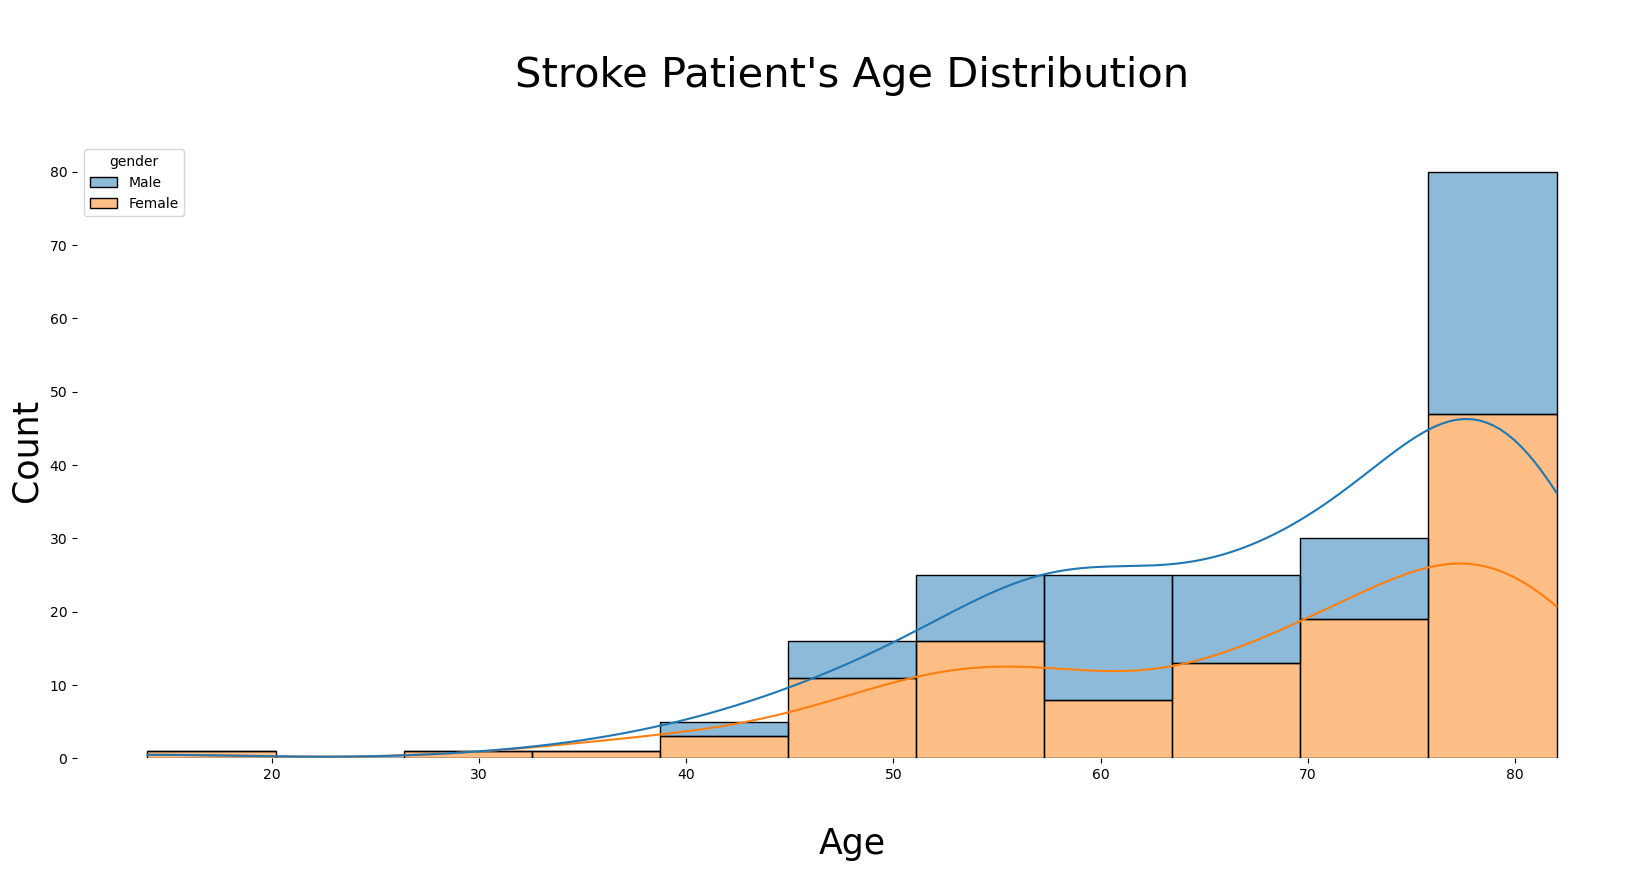

In [12]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=df[df['stroke'] == 1],x="age",hue="gender",multiple="stack",kde=True,fill=True)
p.axes.set_title("\nStroke Patient's Age Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAge",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

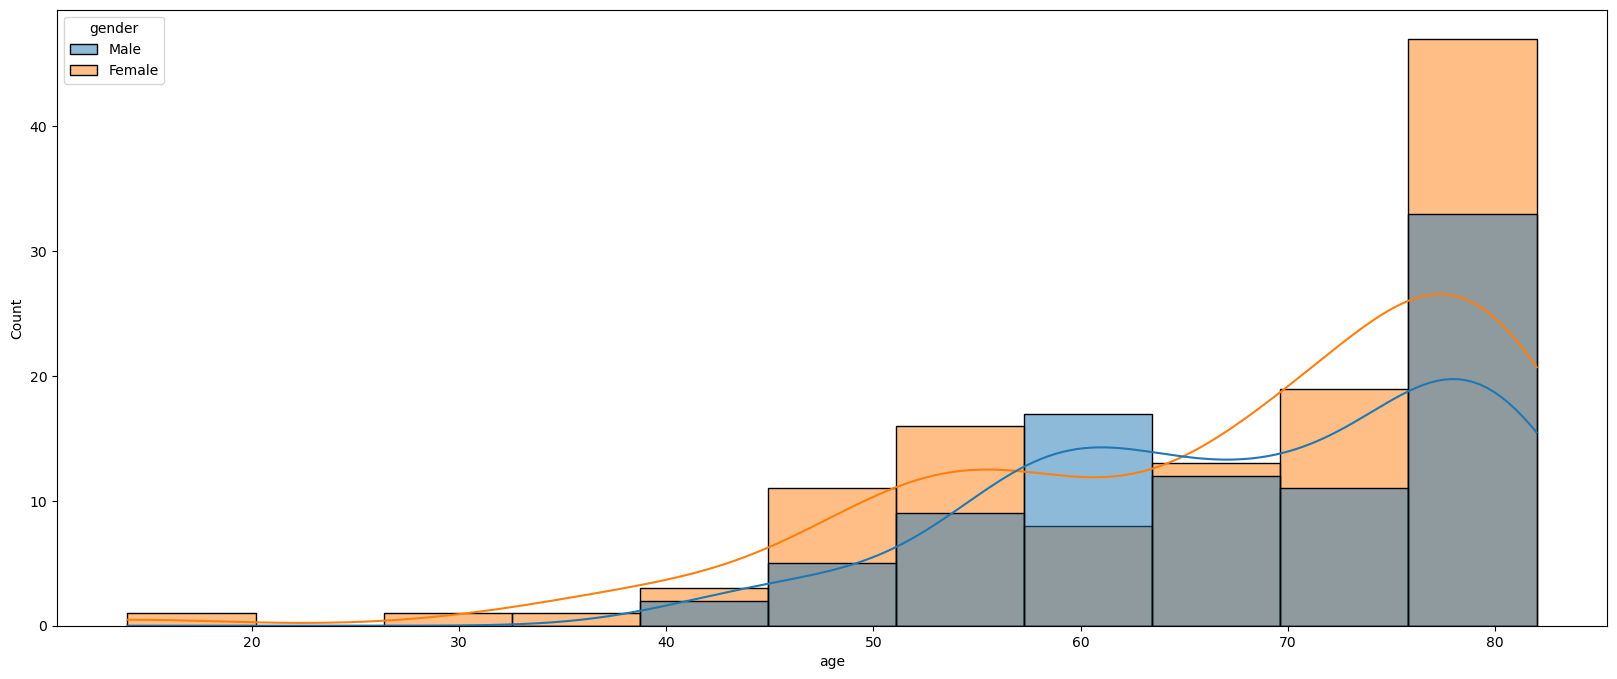

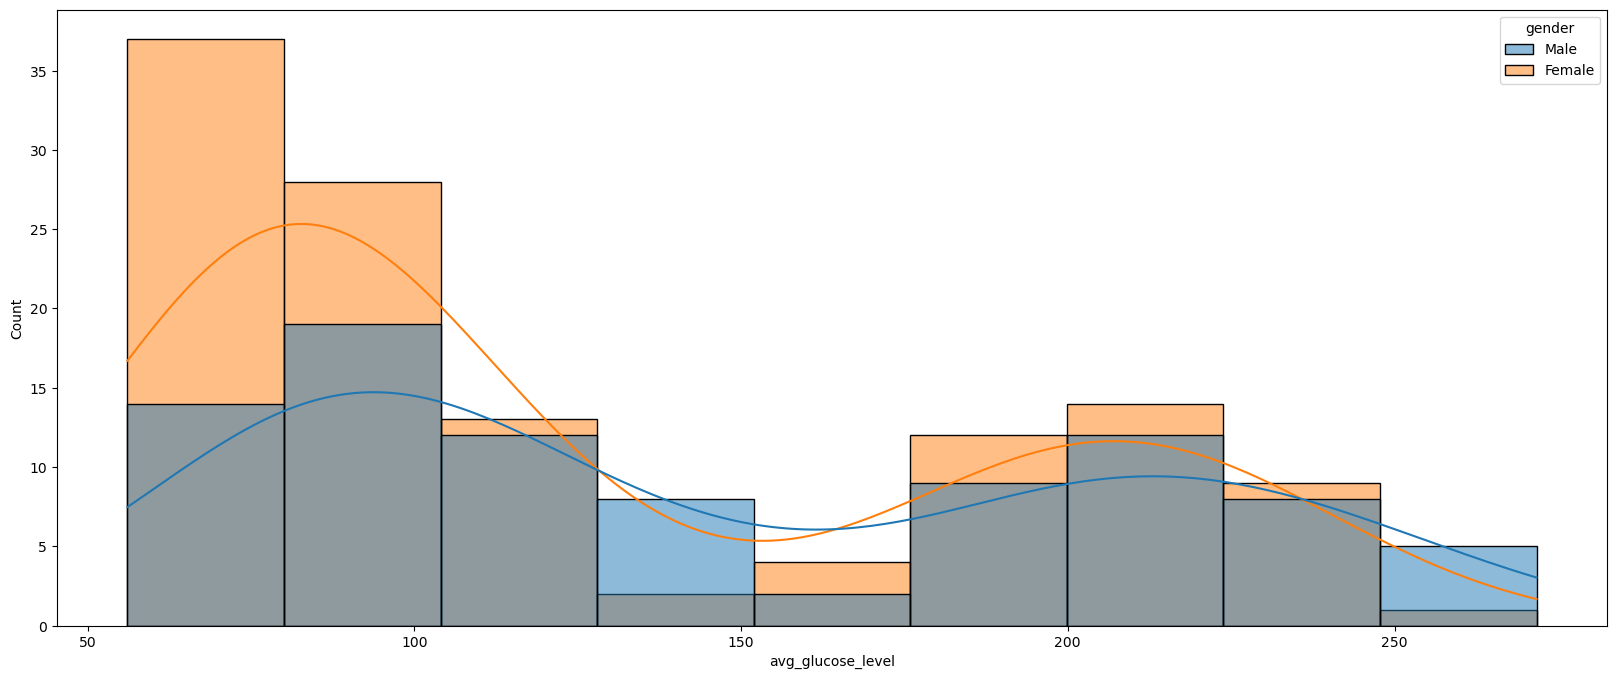

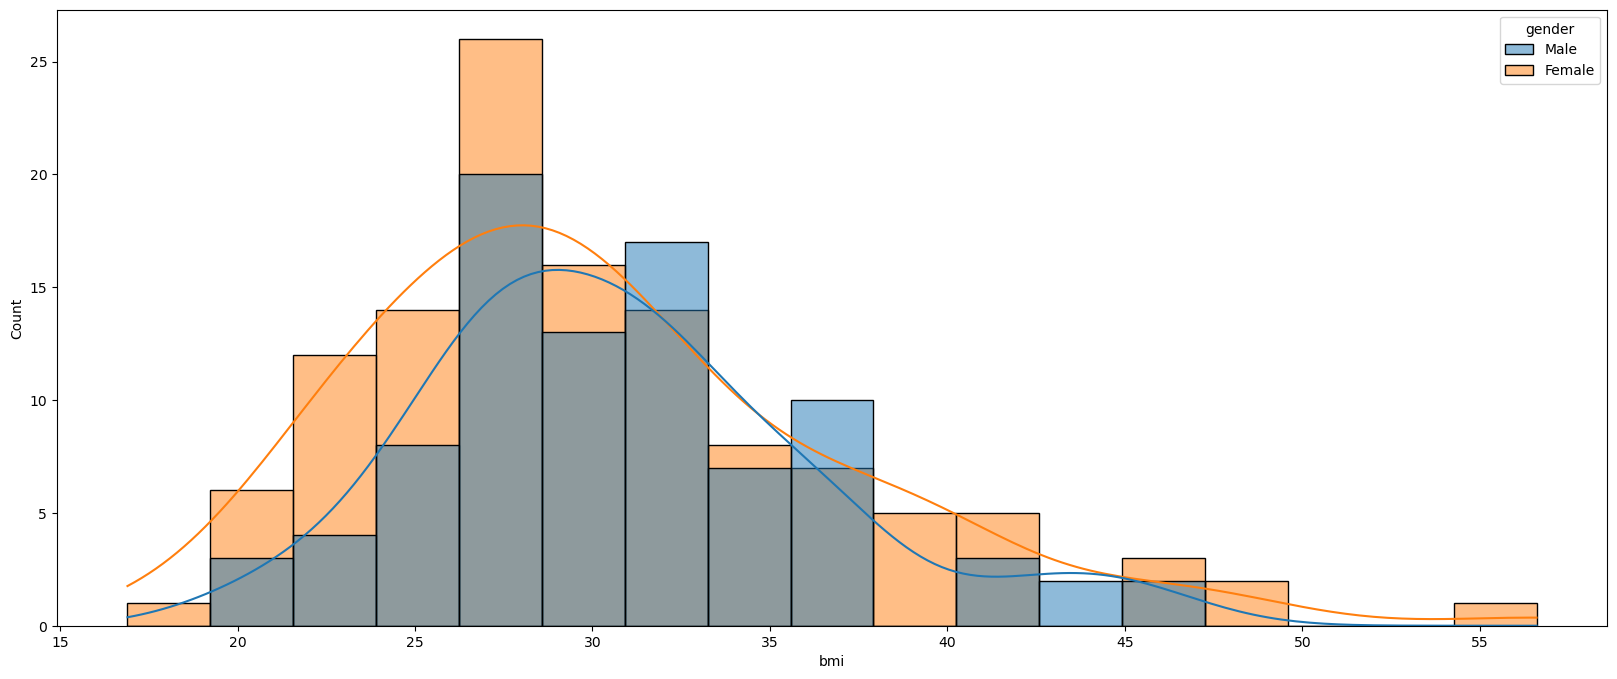

In [18]:
# Histogram for numerical columns

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_columns:
    plt.subplots(figsize=(20, 8))
    sns.histplot(data = df[df['stroke'] == 1], x = col ,hue = 'gender', kde=True)
    plt.show()

# 전처리

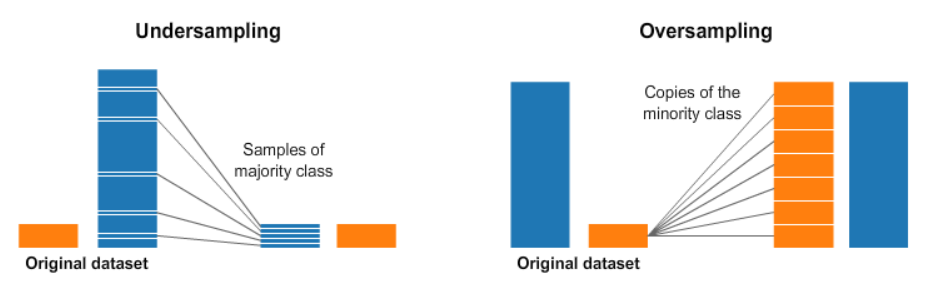

In [65]:
# SMOTE: Synthetic Minority Over-sampling Technique

# imbalanced-learn 패키지
from imblearn.over_sampling import SMOTE
# SMOTE 객체 생성
smote = SMOTE(random_state=42)
# 샘플링
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

ValueError: could not convert string to float: 'Male'

In [66]:
# 랜덤하게 학습데이터와 테스트 데이터를 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3927, 11), (982, 11), (3927,), (982,))

In [67]:
#scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train[['age','avg_glucose_level','bmi']])
X_test_scaled = std_scaler.transform(X_test[['age','avg_glucose_level','bmi']])


# onehotencoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X_train[['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']])
X_train_enc = enc.transform(X_train[['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]).toarray()
X_test_enc = enc.transform(X_test[['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]).toarray()
# data merge
X_train_proc = np.c_[X_train_scaled,X_train_enc]
X_test_proc = np.c_[X_test_scaled,X_test_enc]

In [58]:
#scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train[['age','avg_glucose_level','bmi']]) # ,'avg_glucose_level','bmi'
X_test_scaled = std_scaler.transform(X_test[['age','avg_glucose_level','bmi']]) # ,'avg_glucose_level','bmi'


# onehotencoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X_train[['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']])
X_train_enc = enc.transform(X_train[['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]).toarray()
X_test_enc = enc.transform(X_test[['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]).toarray()
# data merge
X_train_proc = np.c_[X_train_scaled,X_train_enc]
X_test_proc = np.c_[X_test_scaled,X_test_enc]

In [72]:
# Importing SMOTE for oversampling the minority class
from imblearn.over_sampling import SMOTE

# Randomforest
from sklearn.ensemble import RandomForestClassifier

# Creating SMOTE object
smote = SMOTE(random_state=42)

# Applying SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_proc, y_train)

# Training Random Forest model on the resampled data
forest_resampled = RandomForestClassifier(100, max_depth=1, max_features=2, random_state=42)
forest_resampled.fit(X_train_resampled, y_train_resampled)

# Checking the new distribution of the target variable after SMOTE
y_train_resampled.value_counts()

0    3771
1    3771
Name: stroke, dtype: int64

In [75]:
from sklearn.metrics import classification_report
y_train_resampled_pred = forest_resampled.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_train_resampled_pred))

              precision    recall  f1-score   support

           0       0.86      0.64      0.74      3771
           1       0.71      0.90      0.80      3771

    accuracy                           0.77      7542
   macro avg       0.79      0.77      0.77      7542
weighted avg       0.79      0.77      0.77      7542



onehot encoder

### OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder()
encoded = oh_enc.fit_transform(tips[['day']])
encoded

<244x4 sparse matrix of type '<class 'numpy.float64'>'
	with 244 stored elements in Compressed Sparse Row format>

In [ ]:
encoded.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [ ]:
df_enc = pd.DataFrame(encoded.toarray(), columns = oh_enc.categories_)
df_enc

,Fri,Sat,Sun,Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
239,0.0,1.0,0.0,0.0
240,0.0,1.0,0.0,0.0
241,0.0,1.0,0.0,0.0
242,0.0,1.0,0.0,0.0


In [ ]:
df_enc.sum()

Fri     19.0
Sat     87.0
Sun     76.0
Thur    62.0
dtype: float64

In [ ]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### pandas : get_dummies

In [ ]:
pd.get_dummies(tips['day'])

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0


In [53]:
X_train_scaled

array([[-0.12265929, -0.89044802,  0.3065734 ],
       [ 0.72186525, -0.53286955,  0.51320287],
       [ 0.63296793,  2.52603739,  1.00394788],
       ...,
       [ 0.45517329, -0.32985871, -0.86863175],
       [-1.41167043, -0.26541798, -1.0365182 ],
       [ 0.89965989, -1.06957523, -0.00337082]])

In [43]:
X_train['hypertension'] = enc.transform(X_train['hypertension'])

c:\Users\User\anaconda3\envs\skkai\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


ValueError: X does not contain any features, but OneHotEncoder is expecting 6 features

In [50]:
# X_train[['age','avg_glucose_level','bmi']]
# X_train['age'] = std_scaler.transform(X_train[['age']])

In [ ]:
# pd.get_dummies(df) #  -> obj data는 한방에 전처리, 전처리 노트 맨아래부분에 있다

In [59]:
# forest.predict(X_test_proc)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
predictions = forest.predict(X_test_proc)
count_0 = np.count_nonzero(predictions == 0)
count_1 = np.count_nonzero(predictions == 1)

print("Count of 0:", count_0)
print("Count of 1:", count_1)

Count of 0: 982
Count of 1: 0


In [60]:
y_test.value_counts()

0    929
1     53
Name: stroke, dtype: int64

# 학습

In [61]:
# Randomforest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(100, max_depth = 1, max_features = 2)
forest.fit(X_train_proc, y_train)

# Adaboost
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators = 9,
                               algorithm = 'SAMME.R',
                               learning_rate = 0.5).fit(X_train_proc, y_train)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, 
                                  random_state=0).fit(X_train_proc, y_train)

# 평가

In [62]:
# Forest Score
print('train_score :{:.3f}'.format(forest.score(X_train_proc, y_train)))
print('test score : {:.3f}'.format(forest.score(X_test_proc, y_test)))

train_score :0.960
test score : 0.946


In [63]:
# Ada Score
print('train_score :{:.3f}'.format(model_ada.score(X_train_proc, y_train)))
print('test score : {:.3f}'.format(model_ada.score(X_test_proc, y_test)))

train_score :0.960
test score : 0.946


In [64]:
# Decision Tree score
print('train score : {:.3f}'.format(model_dt.score(X_train_proc, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test_proc, y_test)))

train score : 0.962
test socre : 0.940


# Tuning

## RF

In [25]:
# RandomForest
# Tune hyperparameters using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [1, 2, 3, 4, 5], 'max_features': [2, 3, 4]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_proc, y_train)
print('Best parameters for RandomForestClassifier:', grid_search.best_params_)
print('Best accuracy for RandomForestClassifier:', grid_search.best_score_)

Best parameters for RandomForestClassifier: {'max_depth': 1, 'max_features': 2, 'n_estimators': 50}
Best accuracy for RandomForestClassifier: 0.9602751981329314


In [26]:
# Randomforest @ Best parameters
from sklearn.ensemble import RandomForestClassifier
forest_best = RandomForestClassifier(50, max_depth = 1, max_features = 2)
forest_best.fit(X_train_proc, y_train)

RandomForestClassifier(max_depth=1, max_features=2, n_estimators=50)

In [27]:
# Forest_Best Score
print('train_score :{:.3f}'.format(forest_best.score(X_train_proc, y_train)))
print('test score : {:.3f}'.format(forest_best.score(X_test_proc, y_test)))

train_score :0.960
test score : 0.946


In [28]:
# forest importance
forest.feature_importances_

array([0.08, 0.04, 0.09, 0.09, 0.1 , 0.03, 0.06, 0.1 , 0.1 , 0.  , 0.02,
       0.03, 0.02, 0.05, 0.01, 0.01, 0.03, 0.07, 0.02, 0.05])

In [29]:
# adaboost importance
model_ada.feature_importances_

array([0.55555556, 0.33333333, 0.11111111, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [30]:
# forest_best importance
forest_best.feature_importances_

array([0.08, 0.14, 0.02, 0.02, 0.1 , 0.08, 0.16, 0.08, 0.06, 0.  , 0.02,
       0.02, 0.  , 0.04, 0.02, 0.  , 0.06, 0.08, 0.02, 0.  ])

In [31]:
# decision tree importance
model_dt.feature_importances_

array([0.63159702, 0.23679477, 0.09560668, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01268221, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02331932, 0.        ])

## DT

In [32]:
from sklearn.model_selection import GridSearchCV

# Decision Tree 객체 생성
DTC = DecisionTreeClassifier(random_state=41, )

# param_grid 설정
dtc_param_grid = {
            "criterion" : ["gini", "entropy"],
            "max_depth" :   [2, 3, 4, 5,  6, 7, 8],
            "min_samples_leaf" : [1, 3, 5, 7]
            }
# 목적: validation 성능 최대되는 하이퍼파라미터 찾기
# Grad Search 객체 생성
gsDTC = GridSearchCV(DTC,
                     param_grid = dtc_param_grid, 
                     cv=4, 
                     scoring="accuracy", 
                     n_jobs= 4, 
                     verbose = 1)

# verbose: 돌아가는 중간중간 상황을 알려주길 원하면 verbose를 1,2,...로, 결과만 알고싶으면 0으로
# n_jobs: 병렬연산의 갯수, 컴퓨터 연산옵션..
# cv: 교차검증을 위한 fold 횟수

# Grid Search 실행
gsDTC.fit(X_train_proc,y_train)

Fitting 4 folds for each of 56 candidates, totalling 224 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=41), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 3, 5, 7]},
             scoring='accuracy', verbose=1)

In [33]:
# 최적의 파라미터 조합 출력
DTC_best = gsDTC.best_estimator_
print(DTC_best)
# 최고 점수(accuracy) 출력
print(gsDTC.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=41)
0.9602750113666797


In [34]:
print('train score : {:.3f}'.format(DTC_best.score(X_train_proc, y_train)))
print('test socre : {:.3f}'.format(DTC_best.score(X_test_proc, y_test)))

train score : 0.960
test socre : 0.946


# 모델 저장

In [17]:
# Save model
# forest model
with open('stroke_forest_pickle', 'wb') as f:
    pickle.dump(forest, f)
# adaboost model
with open('stroke_ada_pickle', 'wb') as f:
    pickle.dump(model_ada, f)
# forest_best model
with open('stroke_forest_best_pickle', 'wb') as f:
    pickle.dump(forest_best, f)
# decision tree model
with open('stroke_dt_pickle', 'wb') as f:
    pickle.dump(model_dt, f)